# linear reg model and how does it work on real world data

In [2]:
import pandas as pd
import numpy as np

In [22]:
df=pd.read_csv('placementREG.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [23]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [6]:
#no nan value 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [25]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0],df.iloc[:,[-1]],test_size=0.2)

In [26]:
X_train

3      7.42
37     5.90
141    6.76
65     7.60
42     5.95
       ... 
132    5.84
131    6.37
149    8.28
165    8.21
78     6.59
Name: cgpa, Length: 160, dtype: float64

In [27]:
#simple linear reg taking only one col as input
lr= LinearRegression ()

In [28]:
lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [29]:
ypred=lr.predict(X_test.values.reshape(-1,1))

In [30]:
ypred

array([[1.71543224],
       [2.95368722],
       [2.50080693],
       [2.47787628],
       [3.20592435],
       [2.83330132],
       [2.38042103],
       [2.2485698 ],
       [2.11098591],
       [2.39188635],
       [3.18872637],
       [2.97661787],
       [3.3951022 ],
       [2.05365929],
       [2.97088521],
       [3.73332925],
       [2.34602506],
       [3.28618162],
       [3.06834046],
       [1.93900606],
       [2.64412348],
       [2.08805527],
       [2.49507427],
       [3.00528118],
       [3.20019169],
       [3.07980579],
       [2.20270851],
       [2.48360894],
       [1.92754073],
       [2.48360894],
       [2.55240089],
       [2.56959887],
       [3.36643889],
       [3.52695342],
       [3.33777558],
       [4.34099142],
       [4.19767487],
       [2.63265815],
       [2.78744003],
       [3.13139975]])

In [14]:
lr.intercept_#b

array([-0.89487092])

In [15]:
lr.coef_#m

array([[0.55771754]])

In [ ]:
# now creating  a class for simple lr sam eway as sk learn work 

In [16]:
class mineLR:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            
            num = num + ((X_train.values[i] - X_train.mean())*(y_train.values[i] - y_train.mean()))
            den = den + ((X_train.values[i] - X_train.mean())*(X_train.values[i] - X_train.mean()))
        
        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)       
    
    def predict(self,X_test):
        
        print(X_test)
        
        return self.m * X_test + self.b


In [17]:
lr1=mineLR()

In [18]:
lr1.fit(X_train,y_train) # same value of m and b as got above

package    0.557718
dtype: float64
package   -0.894871
dtype: float64


In [19]:
X_train.values[0]

7.89

# TYPES OF ACCURACY AND LOSS MATRIX:
IE R2 SCORE MSE ,MAE, RMSE, ADJUSTED R2 SCORE THEY ALL TELL HOW MUCH ERROR OUR MODEL ID PRODUCING IN THEIR OWN WAY R2 BY 

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [32]:
ypred

array([[1.71543224],
       [2.95368722],
       [2.50080693],
       [2.47787628],
       [3.20592435],
       [2.83330132],
       [2.38042103],
       [2.2485698 ],
       [2.11098591],
       [2.39188635],
       [3.18872637],
       [2.97661787],
       [3.3951022 ],
       [2.05365929],
       [2.97088521],
       [3.73332925],
       [2.34602506],
       [3.28618162],
       [3.06834046],
       [1.93900606],
       [2.64412348],
       [2.08805527],
       [2.49507427],
       [3.00528118],
       [3.20019169],
       [3.07980579],
       [2.20270851],
       [2.48360894],
       [1.92754073],
       [2.48360894],
       [2.55240089],
       [2.56959887],
       [3.36643889],
       [3.52695342],
       [3.33777558],
       [4.34099142],
       [4.19767487],
       [2.63265815],
       [2.78744003],
       [3.13139975]])

In [33]:
#mae
print('mae', mean_absolute_error(y_test,ypred))

mse 0.21565144146913706


In [34]:
print('mse', mean_squared_error(y_test,ypred))

mse 0.08579252448111634


In [35]:
#r2 score
print('r2',r2_score(y_test,ypred))

r2 0.7680748754108444


In [36]:
#adjusted r2 core
r2=r2_score(y_test,ypred)

In [37]:
adr2=1 - ((1-r2)*(40-1)/(40-1-1))

In [38]:
adr2

0.7619715826584982

In [39]:
# now lets check how irrelevant col impact on r2 score

In [41]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.600938,3.26
1,5.12,0.276721,1.98
2,7.82,0.497168,3.25
3,7.42,0.376953,3.67
4,6.94,0.704019,3.57


In [ ]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [42]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()

In [43]:
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7800801044185123


In [45]:
1 - ((1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-1-2))

0.777278577086264

In [40]:
# now lets check how relevant col impact on r2 score

In [50]:
import matplotlib.pyplot as plt

new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2

,cgpa,iq,package
0,6.89,3.76,3.26
1,5.12,2.68,1.98
2,7.82,3.75,3.25
3,7.42,4.77,3.67
4,6.94,3.07,3.57
...,...,...,...
195,6.93,1.56,2.46
196,5.89,3.67,2.57
197,7.21,3.94,3.24
198,7.63,3.36,3.96


Text(0, 0.5, 'Package(in lpa)')

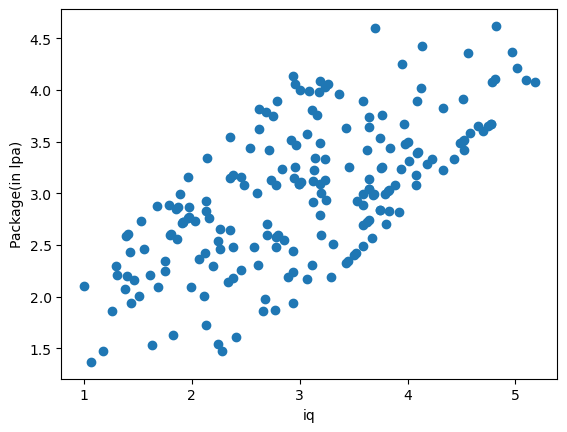

In [51]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')#linear rel

In [52]:
np.random.randint(-100,100)
44
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [55]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8487960030292856


In [56]:
1 - ((1-r2)*(X_train.shape[0]-1)/(X_train.shape[0]-1-2))

0.8468698374627797